# Naive Bayes : 


## EDA : 

In [98]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


In [100]:
df= pd.read_csv("Iris.csv")

In [102]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [110]:
 df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [112]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Bar Plot : 

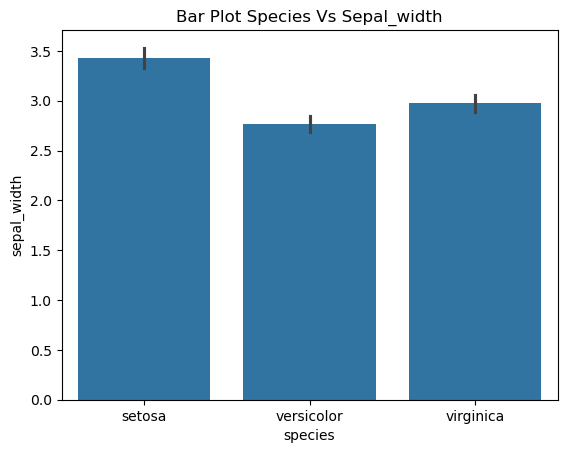

In [115]:
Iris = sns.load_dataset("Iris")
sns.barplot(x = "species", y = "sepal_width" , data = Iris)
plt.title("Bar Plot Species Vs Sepal_width")
plt.show()

## Scatter Plot : 

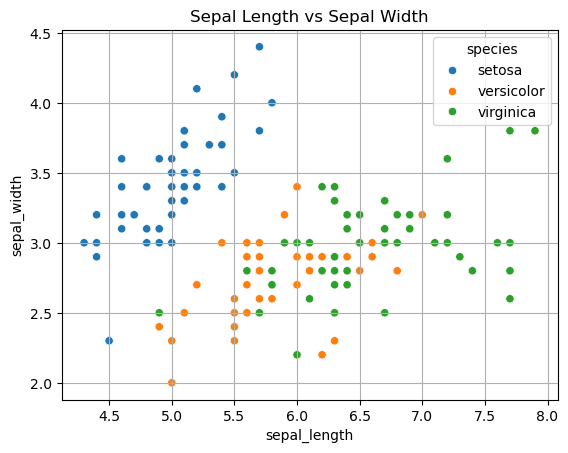

In [155]:
sns.scatterplot(x = "sepal_length", y = "sepal_width", data = Iris , hue = 'species')
plt.title("Sepal Length vs Sepal Width")
plt.grid()
plt.show()

## Histplot : 

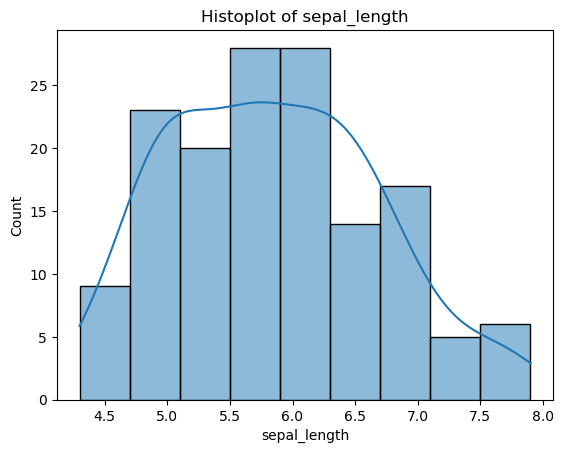

In [121]:
sns.histplot(iris['sepal_length'], kde = True )
plt.title("Histoplot of sepal_length")
plt.show()

## Box Plot : 

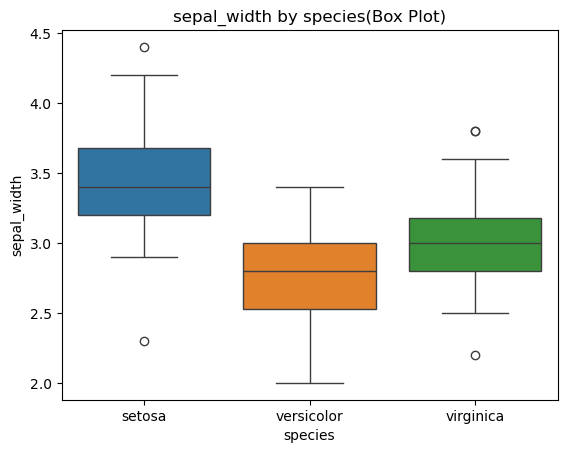

In [124]:
sns.boxplot(x = "species",y= "sepal_width", data = iris , hue = 'species')
plt.title("sepal_width by species(Box Plot)")
plt.show()

## Heat Map : 

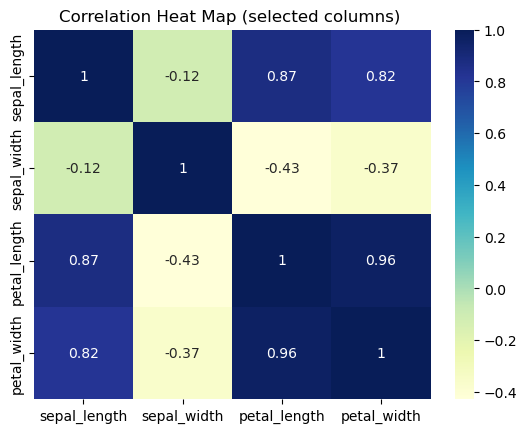

In [130]:
# only take numeric value

selected_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width' ]

corr = iris[selected_columns].corr()

# plot heat map 

sns.heatmap(corr , annot = True , cmap = 'YlGnBu')
plt.title("Correlation Heat Map (selected columns) ")
plt.show()

## Implementation of Naive Bayes Algorithm

In [134]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

y = df['Species']

In [136]:
# train/test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
m1 = GaussianNB()

In [140]:
# training ... fitting 
m1.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [142]:
df.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [144]:
m1.predict([[3,4,2,0.5]])

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype='<U15')

In [146]:
y_pred = m1.predict(X_test) # output predicted by the model

In [148]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


### With an accuracy of 98%, Naive Bayes proved to be efficient for this classification task. The model's strong performance can be attributed to the dataset's relatively clean feature distribution and low multicollinearity. However, in domains where features are highly correlated (violating the independence assumption), this performance might drop.